# 2D Materials Database Summary
(Research article: https://arxiv.org/ftp/arxiv/papers/1901/1901.09487.pdf)

**2DMatPedia** or *2D Materials Encyclopedia* is a dataset of 2D materials, with more than 6,000 monolayer structures, obtained from both top‐down and bottom‐up discovery procedures by:
* Screening all bulk materials in the database of Materials Project for layered structures using a topology‐based algorithm, and theoretically exfoliate them into monolayers. 
* Generating new 2D materials by chemical substitution of elements in known 2D materials by others from the same group in the periodic table. 
* Calculating the structural, electronic and energetic properties consistently, to provide a starting point for further material screening, data mining, data analysis and artificial intelligence applications.

## Workflow

![2dmat.png](2dmat.png)

* started from the > 80000 inorganic compounds in Materials Project database. 
* focused on elemental, binary, ternary and quaternary compounds in the initial stage (ignored structures with more than 40 atoms in the primitive unit cell)
* top‐down approach was applied to screen the database for layered structures and generate 2D materials. Structure matching tools from pymatgen were used to remove duplicates in the exfoliated 2D materials. 
* High‐throughput calculations, adopting the same standards set by the Materials project, were carried out to optimize the structures, and perform static, density of states (DOS) and band structure calculations for these 2D materials. 
* The calculated properties are stored in 2DMatPedia. The unary and binary 2D materials obtained from the top‐down approach were then used as initial structures for elemental substitution. 
* Structure matching was applied again to these 2D materials obtained through this bottom‐up approach to ensure that only unique structures are included for further high‐throughput density functional theory (DFT) calculations.   

#### Resources
* pymatgen/4.7.3 https://github.com/materialsproject
* atomate/0.5.1 https://github.com/hackingmaterials
* Web interface http://www.2dmatpedia.org/
* JARVIS DFT https://www.ctcms.nist.gov/~knc6/JVASP.html
* JARVIS-Tools https://github.com/usnistgov/jarvis

## Exploring Dataset
The dataset presents a large collection of more than 6000 2D materials with consistently calculated structural, energetic and electronic properties. Currently, the database includes unary and binary bottom‐up 2D compounds by systematically elemental substitution. 

In [2]:
import json

materials=[]
with open('db.json', 'r') as file:
    for line in file:
        materials.append(json.loads(line))

print("Found %s materials" % len(materials))

Found 6351 materials


In [9]:
import pandas as pd
import matplotlib
%matplotlib inline

materials_df = pd.DataFrame.from_dict(materials)
materials_df.set_index('material_id', inplace=True)

In [10]:
# drop unnecessary columns
for col in ['_id','_tasksbuilder','created_at']:
    if col in materials_df.columns:
        materials_df.drop(col, axis=1, inplace=True)

In [11]:
# expand dictionaries in cells
for dict_column in ['bandstructure', 'calc_settings', 'spacegroup', 'thermo']:
    if dict_column in materials_df.columns:
        materials_df=materials_df.join(materials_df[dict_column].apply(pd.Series),lsuffix='_orig')
        materials_df.drop([dict_column], axis=1, inplace=True)

In [12]:
materials_df.head()

,sg_number,formula_pretty,nelements,creation_task_label,chemsys,discovery_process,formula_reduced_abc,sg_symbol,formula_anonymous,source_id,...,symbol,number,point_group,source,crystal_system,hall,energy_vdw,energy_vdw_per_atom,energy,energy_per_atom
material_id,,,,,,,,,,,,,,,,,,,,,
2dm-1,164,IrF2,2,mp-30033_sub_round2highcri2-relax,F-Ir,bottom-up,F2 Ir1,P-3m1,AB2,mp-30033,...,P-3m1,164,-3m,spglib,trigonal,"-P 3 2""",-10.085057,-3.361686,-13.610467,-4.536822
2dm-2,164,Ba2Sb,2,mp-1245_sub_round2highcri2-static,Ba-Sb,bottom-up,Ba2 Sb1,P-3m1,AB2,mp-1245,...,P-3m1,164,-3m,spglib,trigonal,"-P 3 2""",-6.560988,-2.186996,-9.731382,-3.243794
2dm-3,2,TlS,2,mp-542812_sub_round2highcri2-relax,S-Tl,bottom-up,S1 Tl1,P-1,AB,mp-542812,...,P-1,2,-1,spglib,triclinic,-P 1,-26.777203,-2.231434,-39.908074,-3.325673
2dm-4,166,MoCl2,2,mp-554340_sub_round2highcri2-static,Cl-Mo,bottom-up,Cl2 Mo1,R-3m,AB2,mp-554340,...,R-3m,166,2/m,spglib,trigonal,"-R 3 2""",-26.818245,-4.469708,-31.765686,-5.294281
2dm-6367,164,IrO2,2,mvc-12841_sub_round2highcri2-static,Ir-O,bottom-up,Ir1 O2,P-3m1,AB2,mvc-12841,...,P-3m1,164,-3m,spglib,trigonal,"-P 3 2""",-17.507867,-5.835956,-20.398991,-6.799664


In [31]:
# Columns of Dataset
print(materials_df.columns.tolist())

['sg_number', 'formula_pretty', 'nelements', 'creation_task_label', 'chemsys', 'discovery_process', 'formula_reduced_abc', 'sg_symbol', 'formula_anonymous', 'source_id', 'elements', 'structure', 'bandgap_orig', 'energy_vdw_per_atom_orig', 'magnetism', 'total_magnetization', 'energy_per_atom_orig', 'relative_id', 'decomposition_energy', 'exfoliation_energy_per_atom', 'literature_doi', 'bandgap', 'cbm', 'vbm', 'is_gap_direct', 'is_metal', 'is_hubbard', 'hubbards', 'potcar_spec', 'symbol', 'number', 'point_group', 'source', 'crystal_system', 'hall', 'energy_vdw', 'energy_vdw_per_atom', 'energy', 'energy_per_atom']


#### Key Datatype Description
* **material_id:** IDs for entries in the 2Dmatpedia
* **relative_id:** IDs for where a 2D material is obtained from
* **discovery_process:** How a 2D materials is generated
* **structure:** Relaxed crystal structure represented in dictionary
* **formula:** Chemical formula
* **nelements:** string Number of elements in this material
* **elements:** List of elements in this material
* **spacegroup:** Space group number defined by The International Union of Crystallography
* **point_group:** Point group in Hermann‐Mauguin notation
* **bandgap:** Energy band gap of this material
* **is_gap_direct:** Is the material a direct gap
* **is_metal:** Is the material metallic
* **energy_per_atom:** Energy per atom in eV without vdW correction
* **energy_vdw_per_atom:** Energy per atom in eV with vdW correction
* **exfoliation_energy_per_atom:** Exfoliation energy of the 2D material in eV/atom
* **decomposition_energy_per_atom:** Decomposition energy of the 2D material in eV/atom
* **total_magnetization:** Total magnetic moment in μB
* **nelements:** The number of elements in the material
* **structure**: An alias for final_structure
* **is_hubbard:** A boolean indicating whether the structure was calculated using the Hubbard U extension to DFT
* **hubbards:** An array of Hubbard U values (where applicable)
* **band_gap:** calculated band gap

### Histogram of bandgaps

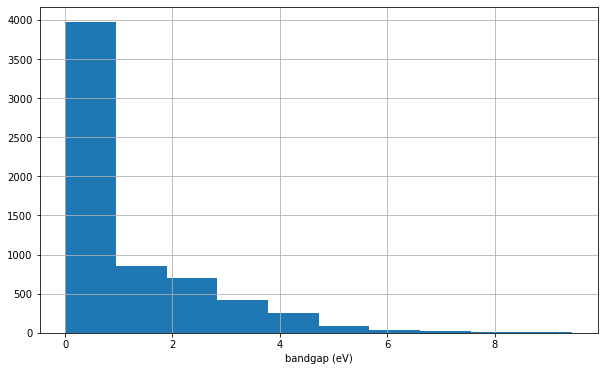

In [24]:
ax=materials_df['bandgap'].hist(figsize=(10,6))
ax.set_xlabel('bandgap (eV)');

### Histogram of number of elements

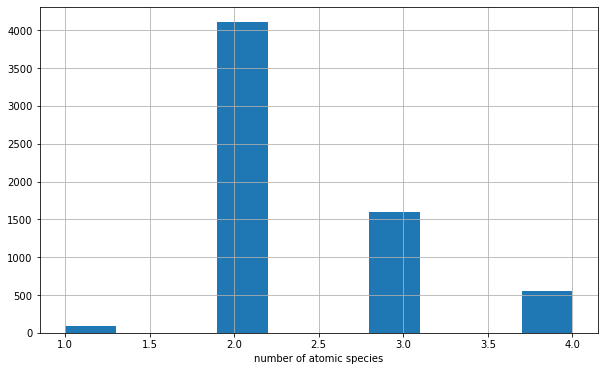

In [23]:
ax=materials_df['nelements'].hist(figsize=(10,6))
ax.set_xlabel('number of atomic species');

### Most common anonynous formula of binary compounts

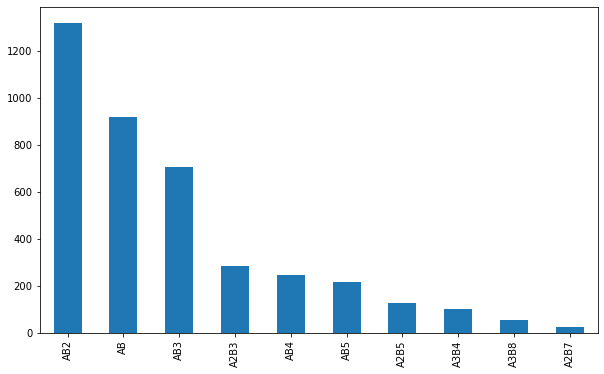

In [25]:
x=materials_df['formula_anonymous'].where(materials_df['nelements'] == 2).value_counts()[:10].plot(kind='bar',figsize=(10,6))

### Most common crystal systems

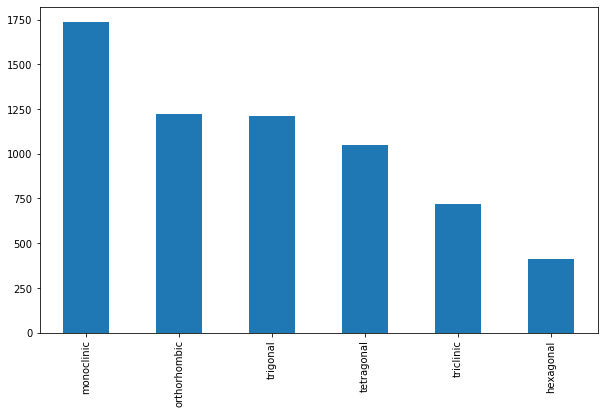

In [26]:
ax=materials_df['crystal_system'].value_counts()[:10].plot(kind='bar',figsize=(10,6))

### Most common spacegroups

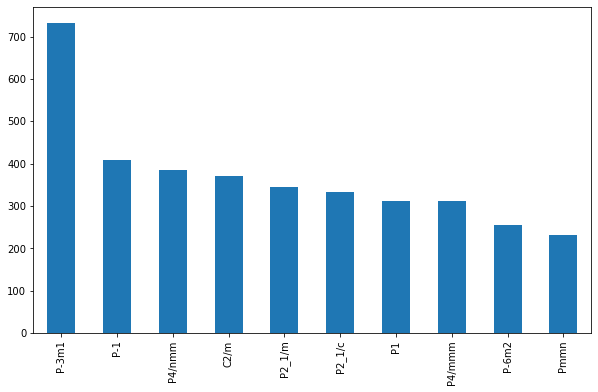

In [27]:
ax=materials_df['sg_symbol'].value_counts()[:10].plot(kind='bar',figsize=(10,6))

## Methods
The methodology applied includes two parts: *discovery processes* to generate 2D structures and *high-throughput density functional calculations* of properties of the 2D materials.
### Discovery processes
The two approaches used are a **top‐down approach**, in which materials from the inorganic bulk crystals in the Materials Project are screened for layered structures which are then theoretically exfoliated to 2D monolayers, and a **bottom‐up approach**, in which elemental substitution is systematically applied to the unary and binary 2D materials obtained from top‐down approach. 

**NOTE:** The “discovery process” here only indicates how a 2D material is generated in this work, which is not necessarily related to its experimental synthesis method. For example, 2D CrI3 as mentioned above is generated by a “bottom‐up” approach here but was exfoliated experimentally.

#### Top‐down approach
A geometry‐based algorithm hs been used to identify layered structures among these compounds by the following steps:  
1. Standard conventional unit cell was used for all the compounds.
2. Check whether two atoms in the unit cell are bonded or not. Use the sum of the covalent radii 35 of two elements with a small tolerance as a threshold. If the distance of two atoms is smaller than the threshold, they are considered boned. Otherwise, they are not bonded.
3. Atoms that are bonded together form a cluster. The number of clusters in the unit cell is counted.  
4. From the unit cell, a 3×3×3 supercell is generated and the number of clusters in the supercell is counted again. If the number of clusters in the supercell is three times of that in the unit cell, the structure was tagged as layered.  
5. A set of tolerances (0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, and 0.4) was used and only the structures identified as layered by at least two tolerances are kept.
6. 2D materials were theoretically exfoliated by extracting one cluster in the standard conventional unit cell of the layered structures screened in the above step. A larger than 20Å vacuum along c axis was imposed to minimize the interactions of image slabs by periodic condition.

#### Bottom‐up approach
1. All the elements of the periodic table (from H to Bi) are categorized in different groups according to their column number. Radioactive elements, lanthanide and actinide with f electrons are excluded except La which is included in group 3 elements.  
2. Systematically replace each element in a known 2D material by one other element in the same category. For instance, 24 new materials can be generated from BN by replacing B with [B, Al, Ga, In, Tl] and N with [N, P, As, Sb, Bi] systematically.  